In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.shape

(144, 2)

In [ ]:
print(df.dtypes)

Month         object
Passengers     int64
dtype: object


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
print(df.dtypes)

Month         datetime64[ns]
Passengers             int64
dtype: object


In [ ]:
df.set_index('Month',inplace=True)

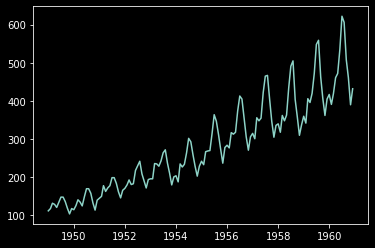

In [ ]:
plt.plot(df['Passengers'])

#verrifying data stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df['Passengers'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.9918802434376409  if above 0.05, data is not stationary


#Data exploration

In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [ ]:
df.head()

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May


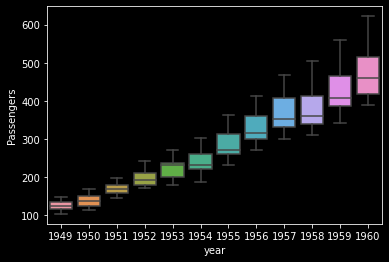

In [ ]:
sns.boxplot(x='year', y='Passengers',data=df)

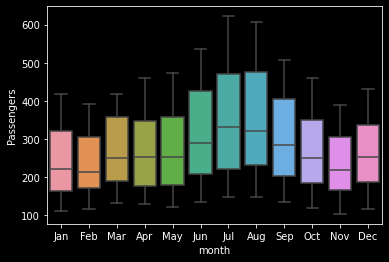

In [ ]:
sns.boxplot(x='month', y='Passengers',data=df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposed = seasonal_decompose(df['Passengers'],model='additive')

In [ ]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

In [ ]:
print(trend)

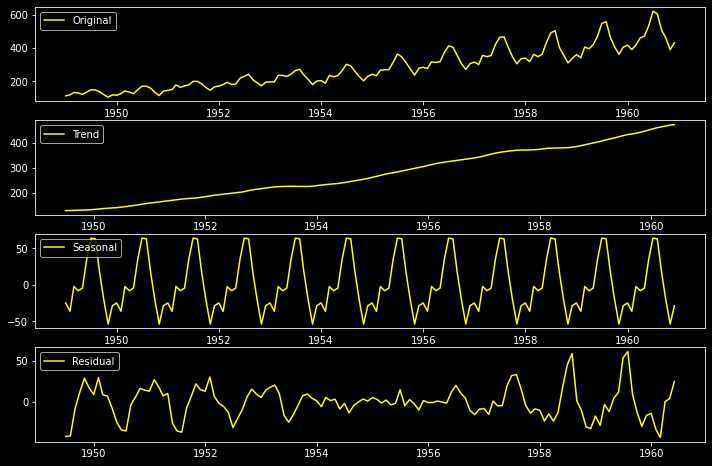

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


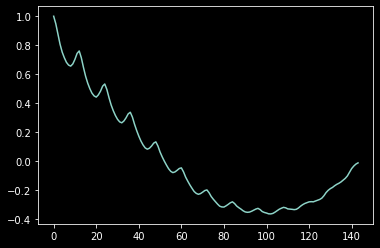

In [ ]:
acf_144 = acf(df.Passengers,nlags=144)
plt.plot(acf_144)

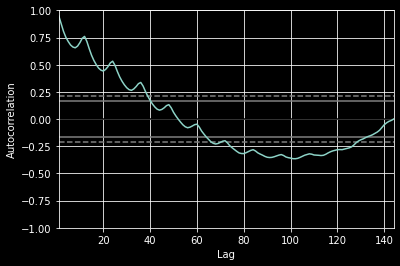

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers)